# Homework 1


This class will be taught in Python and will use some of the most common libraries available for machine learning and data science. This homework's goal is to make sure you have the necessary background to succeed in this class and to confirm all the essential libraries are installed. Please answer the proposed questions in a separate document and attach a PDF version to your zip folder before submitting.

Please note how long (ie 2 hours) you took to finish this assignment as it will be asked at the end of the notebook. This is important to measure how difficult the homeworks are.

## Exercise 1 - Python 

We initialize a list with 1000 random numbers below. Implement the following functions using python (do not use any library for this part of the exercise, you should implement from scratch).

In [44]:
from random import randrange, seed
from typing import *
seed(2) # we define a fixed seed so we can replicate our experiments
random_numbers = [randrange(10) for _ in range(1000)] # we generate 1000 random integers ranging from 0 to 9

In [45]:
# Complete the following functions
def compute_most_frequent(numbers_list:List, top_k:int=3) -> Dict:
    # K is the size of the dictionary you need to return. Keys should be the integers and values should be the counts
    d = dict()
    for num in random_numbers: 
        if num not in d:
            d[num] = 0
        d[num] = d[num] +1
    result = []
    for key, value in d.items():
        result.append((value, key))
    sorted_result = sorted(result, reverse=True)
    
    return sorted_result[:top_k]

def compute_mean(numbers_list:List) -> float:

    return sum(numbers_list)/len(numbers_list)

def compute_median(numbers_list:List) -> float:
    n = len(numbers_list)
    s = sorted(numbers_list)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

def compute_standard_deviation(numbers_list:List) -> float:
    from math import sqrt
    std_deviation = sqrt(sum((i - sum(numbers_list)/len(numbers_list)) ** 2 for i in numbers_list) / (len(numbers_list) - 1))
    return(std_deviation)

def generate_histogram_list(numbers_list:List)->List:
    # This class returns a list with the counts for each integer from 0 to 9
    d = dict()
    for num in random_numbers: 
        if num not in d:
            d[num] = 0
        d[num] = d[num] +1
    hist =[]
    for i in range(0, 10):
        hist.append((d[i]))
    return hist

In [46]:
print(compute_mean(random_numbers))
print(compute_most_frequent(random_numbers))
print(generate_histogram_list(random_numbers))
print(compute_median(random_numbers))
print(compute_standard_deviation(random_numbers))

4.537
[(111, 8), (106, 7), (105, 2)]
[100, 95, 105, 98, 92, 100, 99, 106, 111, 94]
5.0
2.8755694914051197


Now, using any library you want (ie. Numpy, Sklearn, collections), implement the same functions. They should pass the tests below.

In [47]:
# import the required libraries here
import numpy as np
import collections
from collections import Counter
np.mean(random_numbers)

4.537

In [48]:
# Complete the following functions using imported libraries
def compute_most_frequent_using_external_library(numbers_list:List, top_k:int=3) -> Dict:
    # K is the size of the dictionary you need to return. Keys should be the integers and values should be the counts
    return Counter(random_numbers).most_common(top_k)

def compute_mean_using_external_library(numbers_list:List) -> float:
    return np.mean(numbers_list)

def compute_median_using_external_library(numbers_list:List) -> float:
    return np.median(numbers_list)

def compute_standard_deviation_using_external_library(numbers_list:List) -> float:
    return np.std(numbers_list)

def generate_histogram_list_using_external_library(numbers_list:List)->List:
    # This class returns a list with the counts for each integer from 0 to 9
    return np.histogram(numbers_list)

In [50]:
print(compute_most_frequent_using_external_library(random_numbers))
print(compute_mean_using_external_library(random_numbers))
print(compute_median_using_external_library(random_numbers))
print(compute_standard_deviation_using_external_library(random_numbers))
generate_histogram_list_using_external_library(random_numbers)

[(8, 111), (7, 106), (2, 105)]
4.537
5.0
2.8741313470333956


(array([100,  95, 105,  98,  92, 100,  99, 106, 111,  94]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

In [51]:
# Sanity check tests:
assert compute_most_frequent(random_numbers, top_k=3) == compute_most_frequent_using_external_library(random_numbers, top_k=3)
assert compute_mean(random_numbers) == compute_mean_using_external_library(random_numbers)
assert compute_median(random_numbers) == compute_median_using_external_library(random_numbers)
assert compute_standard_deviation(random_numbers) == compute_standard_deviation_using_external_library(random_numbers)
assert generate_histogram_list(random_numbers) == generate_histogram_list_using_external_library(random_numbers)

AssertionError: 

## Exercise 2 - Visualization

Using the output from your `compute_most_frequent` function, use Matplotlib and/or seaborn to generate 3 different plots (ie.histogram).

In [9]:
# import the necessary libraries here
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

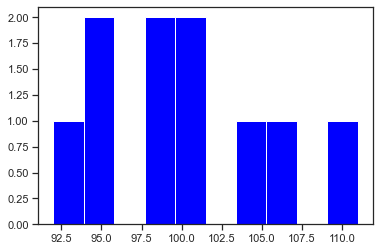

In [10]:
# generate the plots inside this cell
x = generate_histogram_list(random_numbers)

num_bins = 10 
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=1)
plt.show()

In [54]:
import pandas as pd
counts = compute_most_frequent(random_numbers,3)
print(counts)
list_x, list_y =[],[]
    
for numbers, counts in counts.items():
    x.append(numbers)
    y.append(counts)

sns.barplot(x=x, y=y)

[(111, 8), (106, 7), (105, 2)]


AttributeError: 'list' object has no attribute 'items'

### Question 1:
What can you tell us about the data and the function used to generate it?

## Exercise 3 - Numpy

We initialize 3 matrices with random numbers. Complete the code segments

In [11]:
import numpy as np
np.random.seed(0) # we set numpy's seed so we can reproduce results

random_matrix_A = np.random.rand(2,3)
random_matrix_B = np.random.rand(3,2)
random_matrix_C = np.random.rand(3,6)

In [12]:
# Write code below to multiply matrices A and B
AB_mult = random_matrix_A @ random_matrix_B

# Write code below to multiply matrices A and C
AC_mult = random_matrix_A @ random_matrix_C


# Write code below to multiply the squares of AB_mult and AC_mult
AB_squared_plus_AC_squared = np.square(AB_mult) @ np.square(AC_mult)

# Compute the transpose of the matrix  AB_squared_plus_AC_squared
AB_squared_plus_AC_squared_transpose = np.transpose(AB_squared_plus_AC_squared)

### Question 2:
What is the shape of the `AB_squared_plus_AC_squared_transpose` variable?

In [13]:
AB_squared_plus_AC_squared_transpose.shape

(6, 2)

## Exercise 4 - Pandas and Sklearn

Following the methods at https://scikit-learn.org/stable/datasets/index.html, load the Iris dataset into a Pandas dataframe(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [37]:
# import the libraries you need here
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
# load the iris dataset with both features and labels into a Pandas DataFrame
iris_bunch = load_iris(as_frame=True)
iris_dataframe = iris_bunch['data']

In [39]:
iris_bunch.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Compute the count, mean, standard deviation, min and max values for all the features. You can use the functions you implemented or use Pandas built-in functions to do it (recommended).

In [40]:
# Generate and print the statistics for your dataset.
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Question 3:

    a) Which of the features has the largest standard deviation?
    b) What is the average sepal width(cm) for the setosa class?

In [41]:
# Use this area to run any commands you need to answer the questions above.

Plot a histogram with the values for petal length (cm) for the virginica

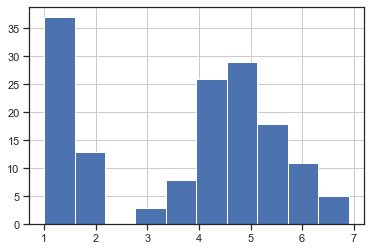

In [42]:
# Plot a histogram of the feature values
iris_dataframe['petal length (cm)'].hist()

In the next cells, we will train your first machine learning algorithm.  Do not worry if you do not understand it yet, we will cover it in the future. The goal here is to check if all the libraries are installed correctly and to get you started with Machine Learning.

Create a train and test split for the data using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [20]:
# Create the train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(iris_dataframe, test_size=0.33,)

In [21]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
19,5.1,3.8,1.5,0.3
142,5.8,2.7,5.1,1.9
81,5.5,2.4,3.7,1.0
54,6.5,2.8,4.6,1.5
...,...,...,...,...
146,6.3,2.5,5.0,1.9
128,6.4,2.8,5.6,2.1
34,4.9,3.1,1.5,0.2
28,5.2,3.4,1.4,0.2


In [22]:
X_train.shape

(100, 4)

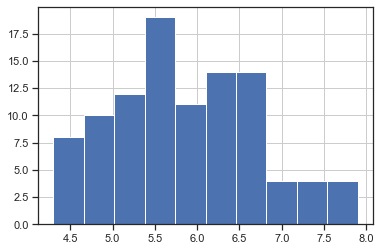

In [23]:
X_train["sepal length (cm)"].hist()

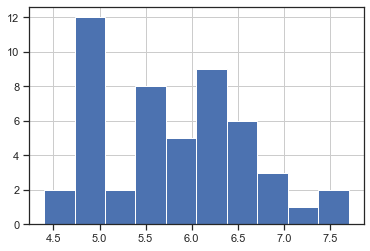

In [24]:
X_test["sepal length (cm)"].hist()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


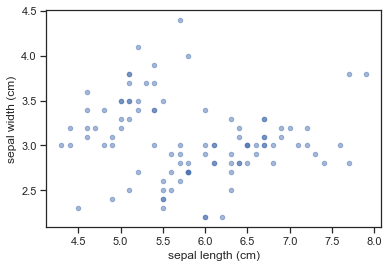

In [25]:
X_train.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)", alpha=0.5)

In [26]:
corr_matrix = X_train.corr()
corr_matrix["sepal length (cm)"].sort_values(ascending = False)

sepal length (cm)    1.000000
petal length (cm)    0.882535
petal width (cm)     0.819460
sepal width (cm)    -0.109750
Name: sepal length (cm), dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0bbeb3990>,
      dtype=object)

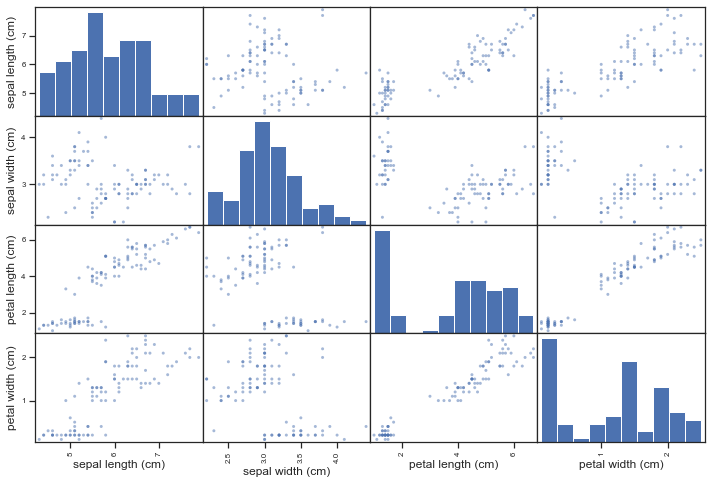

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["sepal length (cm)","sepal width (cm)", "petal length (cm)", "petal width (cm)"]
scatter_matrix(X_train[attributes],figsize=(12,8))

Fit any classification model from sklearn (example:https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) to the training data.

In [32]:
# Fit the model to your training data
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()    #I tried to import my X_train as traininig set,However, I didn't figure out how to do it.
X = iris.data[:, :2]
Y = iris.target

logreg = LogisticRegression()

logreg.fit(X, Y)







LogisticRegression()

Now, generate predictions on your test data and print the classification report (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of your results

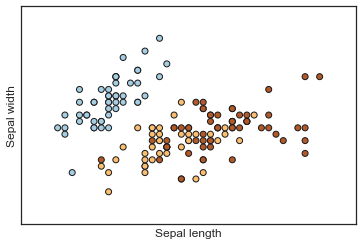

In [33]:
# generate predictions
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


# print classification report

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [34]:
from sklearn.metrics import classification_report
y_true = 
y_pred = 
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

SyntaxError: invalid syntax (<ipython-input-34-fbf3ca1cd456>, line 2)

### Question 4:
This is the end of this assignment. How long did you take to finish it?

In [ ]:
It took me 9 hours including reaing instructions and the book. 

In [36]:
import sklearn
sklearn.__version__

'0.23.1'